# Prototype Code for Delaney

## 1. Import libraries and declare file name

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sflx_file = '8_3_23_LDP1_DB_Total_Sap_Flow.csv'

## 2. Open file and clean data

In [2]:
sflx_df = pd.read_csv(sflx_file)
sflx_df

,Date/Time,Total Sap Flow (L/hr or kg/hr)
0,5/25/2023 17:00,0.44
1,5/25/2023 18:00,0.42
2,5/25/2023 19:00,0.40
3,5/25/2023 20:00,0.35
4,5/25/2023 21:00,0.25
...,...,...
35149,1/0/1900 0:00,NaN
35150,1/0/1900 0:00,NaN
35151,1/0/1900 0:00,NaN
35152,1/0/1900 0:00,NaN


#### 2a. Report on data types

In [3]:
sflx_df.dtypes

Date/Time                          object
Total Sap Flow (L/hr or kg/hr)    float64
dtype: object

#### 2b. Get rid of rows with dates that don't make sense

In [4]:
sflx_df_filt = sflx_df.drop(sflx_df[sflx_df['Date/Time'] == '1/0/1900 0:00'].index)
sflx_df_filt

,Date/Time,Total Sap Flow (L/hr or kg/hr)
0,5/25/2023 17:00,0.44
1,5/25/2023 18:00,0.42
2,5/25/2023 19:00,0.40
3,5/25/2023 20:00,0.35
4,5/25/2023 21:00,0.25
...,...,...
1666,8/3/2023 7:00,0.06
1667,8/3/2023 8:00,0.16
1668,8/3/2023 9:00,0.33
1669,8/3/2023 10:00,0.44


#### 2c. Check datatypes again

In [5]:
sflx_df_filt.dtypes

Date/Time                          object
Total Sap Flow (L/hr or kg/hr)    float64
dtype: object

#### 2d. Convert object to datetime object and verify

In [6]:
sflx_df_filt['Date/Time'] = pd.to_datetime(sflx_df_filt['Date/Time'])
sflx_df_filt.dtypes

Date/Time                         datetime64[ns]
Total Sap Flow (L/hr or kg/hr)           float64
dtype: object

#### 2e. Set index to the `Date/Time` column

In [7]:
sflx_df_filt.set_index('Date/Time',inplace=True)
sflx_df_filt

,Total Sap Flow (L/hr or kg/hr)
Date/Time,
2023-05-25 17:00:00,0.44
2023-05-25 18:00:00,0.42
2023-05-25 19:00:00,0.40
2023-05-25 20:00:00,0.35
2023-05-25 21:00:00,0.25
...,...
2023-08-03 07:00:00,0.06
2023-08-03 08:00:00,0.16
2023-08-03 09:00:00,0.33


## 3. Get diurnal cycles by using groupby on index hour

#### 3a. Get the average diurnal cycle

In [8]:
diurnal_mean = sflx_df_filt.groupby(sflx_df_filt.index.hour).mean()
diurnal_mean

,Total Sap Flow (L/hr or kg/hr)
Date/Time,
0,0.098429
1,0.094857
2,0.093571
3,0.091857
4,0.089857
5,0.089857
6,0.088286
7,0.152286
8,0.266000


#### 3b. Get the standard deviation in the diurnal cycle

In [9]:
diurnal_std = sflx_df_filt.groupby(sflx_df_filt.index.hour).std()
diurnal_std

,Total Sap Flow (L/hr or kg/hr)
Date/Time,
0,0.023321
1,0.022698
2,0.023346
3,0.023424
4,0.023062
5,0.023865
6,0.022713
7,0.058140
8,0.111074


#### 3c. Now create and label a plot and save a `.png`

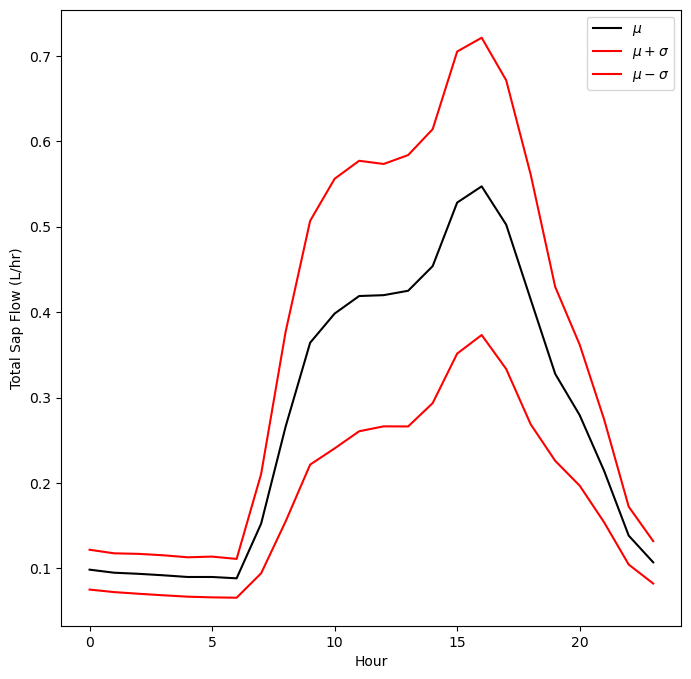

In [10]:
plt.figure(figsize=(8,8))
plt.plot(diurnal_mean.index,diurnal_mean['Total Sap Flow (L/hr or kg/hr)'],'k',label='$\mu$')
plt.plot(diurnal_mean.index,diurnal_mean['Total Sap Flow (L/hr or kg/hr)']+diurnal_std['Total Sap Flow (L/hr or kg/hr)'],'r',label='$\mu + \sigma$')
plt.plot(diurnal_mean.index,diurnal_mean['Total Sap Flow (L/hr or kg/hr)']-diurnal_std['Total Sap Flow (L/hr or kg/hr)'],'r',label='$\mu - \sigma$')
plt.xlabel('Hour')
plt.ylabel('Total Sap Flow (L/hr)')
plt.legend()
plt.savefig('sapflux_diurnal_all.png')
plt.show()

## 4. A slightly more complicated value

Here we're going to group by both month and hour and compute the standard deviation. The result in a new dataframe with a `MultiIndex` with months and hours of the day. We'll need to be careful in how we access that but, in principle, we can create a plot of the diurnal cycle and how it varies by month.

In [11]:
sflx_mon_diel_mean = sflx_df_filt.groupby([sflx_df_filt.index.month,sflx_df_filt.index.hour]).mean()
sflx_mon_diel_mean

Total Sap Flow (L/hr or kg/hr)
Date/Time Date/Time                                
5         0                                0.111667
          1                                0.111667
          2                                0.111667
          3                                0.111667
          4                                0.110000
...                                             ...
8         19                               0.445000
          20                               0.325000
          21                               0.215000
          22                               0.125000
          23                               0.100000

[96 rows x 1 columns]

In [12]:
sflx_mon_diel_std = sflx_df_filt.groupby([sflx_df_filt.index.month,sflx_df_filt.index.hour]).std()
sflx_mon_diel_std

Total Sap Flow (L/hr or kg/hr)
Date/Time Date/Time                                
5         0                                0.016021
          1                                0.014720
          2                                0.014720
          3                                0.014720
          4                                0.017889
...                                             ...
8         19                               0.063640
          20                               0.077782
          21                               0.063640
          22                               0.049497
          23                               0.042426

[96 rows x 1 columns]

#### 4a. How do we use the `MultiIndex`?

The `MultiIndex` is a tuple ordered by (month,hour). We can call a single month by calling `.loc(month,)` which will get all hours for a month. For instance, here's the average diurnal cycle for June:

In [13]:
sflx_mon_diel_mean.loc[6,]

,Total Sap Flow (L/hr or kg/hr)
Date/Time,
0,0.084333
1,0.084333
2,0.086000
3,0.085333
4,0.083667
5,0.083333
6,0.083333
7,0.123000
8,0.196333


#### 4b. Now create a plot of the average and average ± standard deviation sapflux for each month, save a figure

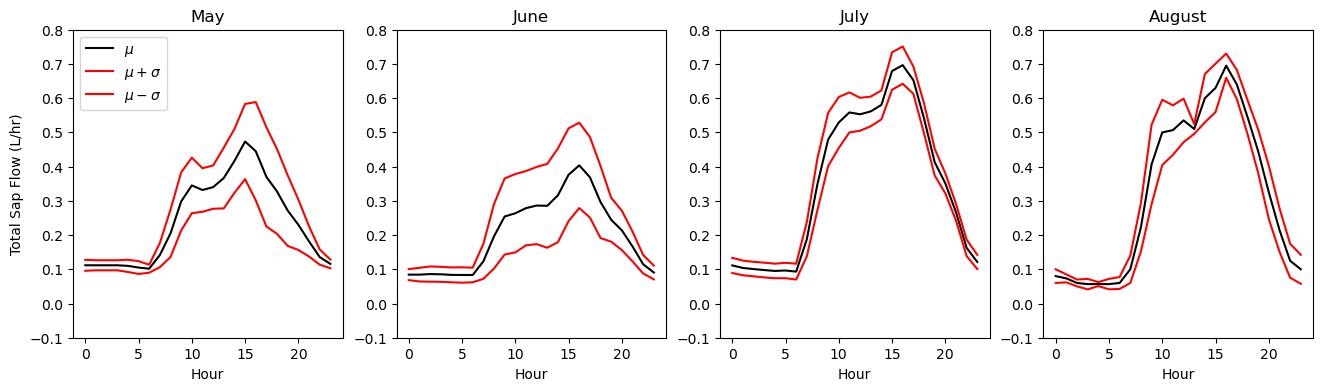

In [14]:
plt.figure(figsize=(16,4))

# Plot May
plt.subplot(1,4,1)
plt.title('May')
plt.plot(sflx_mon_diel_mean.loc[5,].index,sflx_mon_diel_mean['Total Sap Flow (L/hr or kg/hr)'].loc[5,],'k')
plt.plot(sflx_mon_diel_mean.loc[5,].index,sflx_mon_diel_mean['Total Sap Flow (L/hr or kg/hr)'].loc[5,]+sflx_mon_diel_std['Total Sap Flow (L/hr or kg/hr)'].loc[5,],'r')
plt.plot(sflx_mon_diel_mean.loc[5,].index,sflx_mon_diel_mean['Total Sap Flow (L/hr or kg/hr)'].loc[5,]-sflx_mon_diel_std['Total Sap Flow (L/hr or kg/hr)'].loc[5,],'r')
plt.ylabel('Total Sap Flow (L/hr)')
plt.xlabel('Hour')
plt.ylim([-0.1,0.8])
plt.legend(['$\mu$','$\mu + \sigma$','$\mu - \sigma$'])

# Plot June
plt.subplot(1,4,2)
plt.title('June')
plt.plot(sflx_mon_diel_mean.loc[6,].index,sflx_mon_diel_mean['Total Sap Flow (L/hr or kg/hr)'].loc[6,],'k')
plt.plot(sflx_mon_diel_mean.loc[6,].index,sflx_mon_diel_mean['Total Sap Flow (L/hr or kg/hr)'].loc[6,]+sflx_mon_diel_std['Total Sap Flow (L/hr or kg/hr)'].loc[6,],'r')
plt.plot(sflx_mon_diel_mean.loc[6,].index,sflx_mon_diel_mean['Total Sap Flow (L/hr or kg/hr)'].loc[6,]-sflx_mon_diel_std['Total Sap Flow (L/hr or kg/hr)'].loc[6,],'r')
plt.xlabel('Hour')
plt.ylim([-0.1,0.8])

# Plot July
plt.subplot(1,4,3)
plt.title('July')
plt.plot(sflx_mon_diel_mean.loc[7,].index,sflx_mon_diel_mean['Total Sap Flow (L/hr or kg/hr)'].loc[7,],'k')
plt.plot(sflx_mon_diel_mean.loc[7,].index,sflx_mon_diel_mean['Total Sap Flow (L/hr or kg/hr)'].loc[7,]+sflx_mon_diel_std['Total Sap Flow (L/hr or kg/hr)'].loc[7,],'r')
plt.plot(sflx_mon_diel_mean.loc[7,].index,sflx_mon_diel_mean['Total Sap Flow (L/hr or kg/hr)'].loc[7,]-sflx_mon_diel_std['Total Sap Flow (L/hr or kg/hr)'].loc[7,],'r')
plt.xlabel('Hour')
plt.ylim([-0.1,0.8])

# Plot August
plt.subplot(1,4,4)
plt.title('August')
plt.plot(sflx_mon_diel_mean.loc[8,].index,sflx_mon_diel_mean['Total Sap Flow (L/hr or kg/hr)'].loc[8,],'k')
plt.plot(sflx_mon_diel_mean.loc[8,].index,sflx_mon_diel_mean['Total Sap Flow (L/hr or kg/hr)'].loc[8,]+sflx_mon_diel_std['Total Sap Flow (L/hr or kg/hr)'].loc[8,],'r')
plt.plot(sflx_mon_diel_mean.loc[8,].index,sflx_mon_diel_mean['Total Sap Flow (L/hr or kg/hr)'].loc[8,]-sflx_mon_diel_std['Total Sap Flow (L/hr or kg/hr)'].loc[8,],'r')
plt.xlabel('Hour')
plt.ylim([-0.1,0.8])

plt.savefig('sapflux_diurnal_by_month.png')
plt.show()